In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel('iris.xls')

In [ ]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
for cols in ['PL','SW','SL']:
  data[cols]=data[cols].fillna(data[cols].median())

In [ ]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


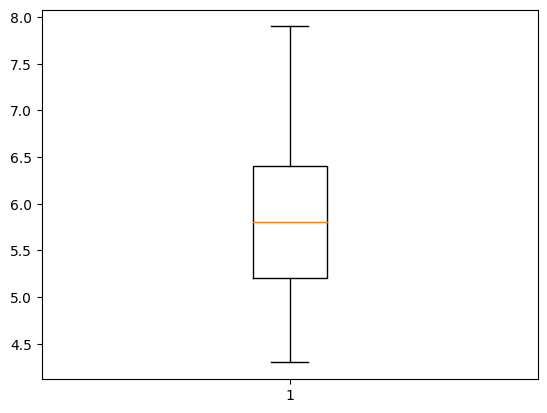

In [ ]:
plt.boxplot(data['SL'])
plt.show()


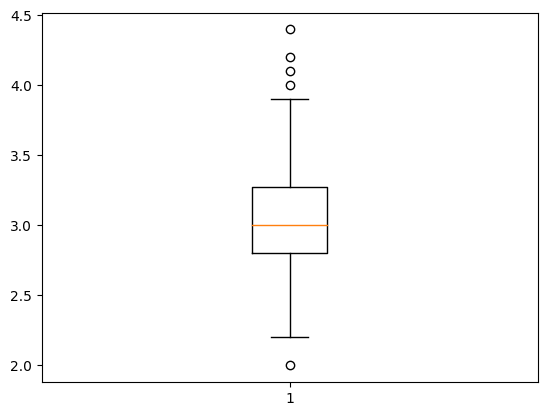

In [ ]:
plt.boxplot(data['SW'])
plt.show()

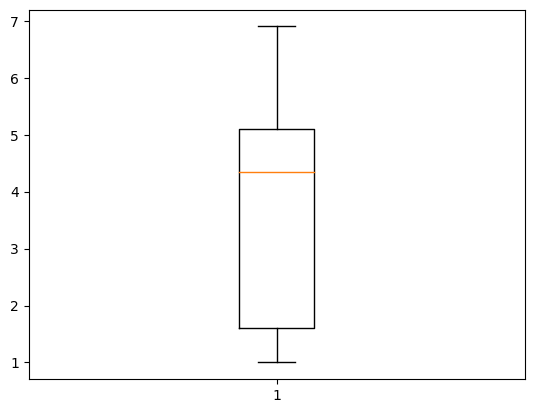

In [ ]:
plt.boxplot(data['PL'])
plt.show()

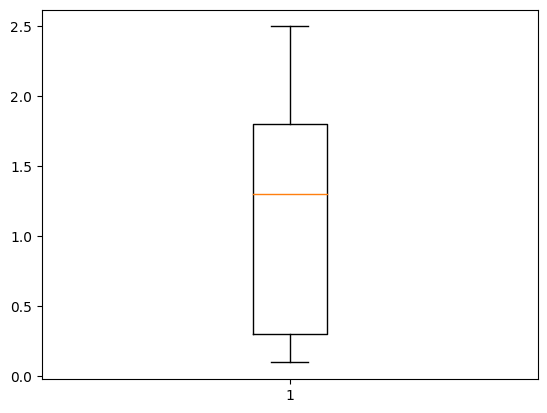

In [ ]:
plt.boxplot(data['PW'])
plt.show()

In [ ]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

<ipython-input-14-a2ab872643a7>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
<ipython-input-14-a2ab872643a7>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
<ipython-input-14-a2ab872643a7>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data['SW'],

In [ ]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [ ]:
IQR=Q3-Q1
print(IQR)


0.4500000000000002


In [ ]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [ ]:
outliers = []
for i in data['SW']:
  if i>up_lim or i<low_lim:
    outliers.append(i)
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [ ]:
ind = data['SW']>up_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [ ]:
data=data.drop([14, 15, 32, 33])

In [ ]:
y= data['Classification']
x=data.drop('Classification',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg_model=lg.fit(x_train,y_train)
y_pred=lg_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print('Accuracy =',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)


Accuracy = 0.9333333333333333


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is ",mean_squared_error(y_test,y_pred))

MSE is  0.048685941959403414


In [ ]:
from sklearn.metrics import r2_score
print("R squared value is ",r2_score(y_test,y_pred))

R squared value is  0.9332052625556966


In [ ]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
model.predict([[4.6,3.1,1.5,0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.05161291])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
#Building Linear Regression Model
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg_model=lg.fit(x_train,y_train)
y_pred=lg_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print('Accuracy =',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy = 0.9333333333333333


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [ ]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')

In [ ]:
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svmclf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy =',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy = 0.9666666666666667


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclf= DecisionTreeClassifier()
dtclf.fit(x_train,y_train)
y_pred =dtclf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy =',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy = 0.9333333333333333


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()
rfclf.fit(x_train,y_train)
y_pred =rfclf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy =',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy = 0.9333333333333333


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

In [ ]:
rfi = RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rfi.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [ ]:
y_pred =rfi.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy =',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy = 0.9333333333333333


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])